OpenCV(정식 명칭 : Open Source Computer Vision Library)은 오픈 소스 컴퓨터 비전 라이브러리
1. 필터링
2. 행렬 계산
3. 객체 추적(Object Tracking)
4. 세분화(Segmentation)
5. 카메라 캘리브레이션(Calibration)
6. 특징점 추출
7. 물체 인식(Object recognition)
8. 기계 학습(Machine learning)
9. 파노라마(Stitching)
10. 컴퓨터 테이 셔널 포토 그래피(Computational Photography)

In [1]:
# openc-python 설치
!pip install opencv-python

In [3]:
!pip install opencv-contrib-python  # opencv docs 링크 : https://docs.opencv.org/

# 이미지 데이터 -> ndarray + scikit -image
1. numpy에서 배열로 이미지를 로드
2. numpy에서 배열로 이미지를 저장
3. 이미지 처리 : 화소값의 처리
4. 단색 이미지 결합
5. 화소 반전, 감색 처리
6. 사칙 연산을 이용 감마값 구한 다음 보정
7. 슬라이싱 작업
8. 알파값 블렌딩 마스크 처리
9. 화정 / 사진비교


In [6]:
#1. numpy에서 배열로 이미지를 로드 np.array() / PIL.Image.open() -> shape
#이미지를 오픈 한, 후 흑백으로 변환 차원으로 리턴해보자.
from PIL import Image
import numpy as np

im = np.array(Image.open('c:\\opencv_test\\Lenna.png').convert('L'))
#Image.open 

print(type(im))  #numpy.ndarray 클래스
print(im.dtype)
print(im.shape)  #행(높이), 열(폭), 색상(채널)
print(im.flags.writeable)  #쓰기금지 = im.flags.writeable
#uint8 [8비트 부호없는 정수] -> float

#RGB(빨강, 초록, 파랑) Image.open()
#BGR(파랑, 초록, 빨강) cv2.imread()

res = im.astype(np.float64)
print(res.dtype)

im02 = np.array(Image.open('c:\\opencv_test\\Lenna.png'),np.float64)
print(im02.dtype)

<class 'numpy.ndarray'>
uint8
(256, 256)
True
float64
float64


In [18]:
#2. numpy에서 배열로 이미지를 저장
#Image.fromarray(ndarray) -> save()
pil_img = Image.fromarray(im)  #배열을 이미지로
print(type(pil_img), pil_img.mode)

pil_img.save("c:\\opencv_test\\temp\\LennaG.jpg")

pil_img02 = Image.fromarray(im02.astype(np.uint8))
print(pil_img,pil_img02.mode)

pil_img02.save("c:\\opencv_test\\temp\\Lenna_C.png")

#유형 변환 0~255까지의  RGB -> 화소값 변환 0.0~1.0 표현값
#uint8 -> astype() -> / -> 스케일링 작업 -> 값*255 -> astype() -> save()
#jpg (1~95) 이며 기본값은 75

<class 'PIL.Image.Image'> L
<PIL.Image.Image image mode=L size=256x256 at 0x1881C49A0D0> RGB


In [20]:
#3. 이미지 처리 : 화소값의 처리
#인덱스 []에서 좌표를 지정하여 화소값을 리턴받는다.
#행, 열의 순서로 지정, 만약 좌표로 생각 y,x 순서 주의!

from PIL import Image
import numpy as np

im = np.array(Image.open('c:\\opencv_test\\Lenna.png'))
print(type(im))

print(im.dtype)
print(im.shape)  #행(높이), 열(폭), 색상(채널)

#ex) 100행의 150번째 화소값을 리턴 받자.
print(im[100][150]) # RGB(r,g,b) = (210,168,154)

R,G,B = im[100][150]
print(R)
print(G)
print(B)

<class 'numpy.ndarray'>
uint8
(256, 256, 3)
[210 168 154]
210
168
154


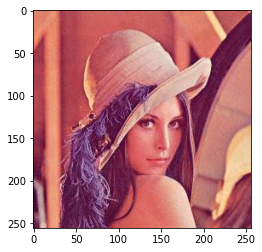

In [21]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

im = Image.open('c:\\opencv_test\\Lenna.png')
res = np.asarray(im)
plt.imshow(res)

In [26]:
#4. 단색 이미지 결합
#5. 화소 반전, 감색처리

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

im = np.array(Image.open('c:\\opencv_test\\Lenna.png')) #이미지를 배열의 객체로 변환
im_R = im.copy() #배열객체 복사
im_R[:,:,(1,2)] = 0

im_G = im.copy() #배열객체 복사
im_G[:,:,(0,2)] = 0

im_B = im.copy() #배열객체 복사
im_B[:,:,(0,1)] = 0

# concatenate, stack, block  =  배열의 결합
im_RGB = np.concatenate((im_R,im_G,im_B),axis = 1)

res_img = Image.fromarray(im_RGB)
res_img.save("c:\\opencv_test\\temp\\LennaRGB.jpg")

im_RGB = np.hstack((im_R,im_G,im_B))
res_img.save("c:\\opencv_test\\temp\\LennaRGB02.jpg")

In [27]:
#5. 화소반전, 감색처리
im = np.array(Image.open('c:\\opencv_test\\Lenna.png'))
im_r = 255 - im


Image.fromarray(im_r).save("c:\\opencv_test\\temp\\Lenna_Res.jpg")

In [28]:
#감색처리 : 수를 줄임
# //로 나눈 나머지를 버린 값을 다시 곱하면 픽셀값의 색상 수를 줄일수 있다.
im = np.array(Image.open('c:\\opencv_test\\Lenna.png'))
im_r = im//32*32
im_r02 = im//128*128

im_RGB = np.concatenate((im,im_r,im_r02),axis = 1)

Image.fromarray(im_RGB).save("c:\\opencv_test\\temp\\Lenna_color.jpg")

In [30]:
#6. 사칙연산을 이용 감마값 구한 다음 보정
# 전체 이미지를 그대로 계산 for X

im = np.array(Image.open('c:\\opencv_test\\Lenna.png'))

im_01 = 255.0 * (im / 255.0)**(1 / 2.2)
im_02 = 255.0 * (im / 255.0)**2.2

im_gamma = np.concatenate((im_01,im,im_02),axis = 1)

#연산 후 datatype이 float로 변환되기 때문에 캐스팅을 해준다
pil_img = Image.fromarray(np.uint8(im_gamma))
pil_img.save("c:\\opencv_test\\temp\\Lenna_numpy_gamma.jpg")

In [33]:
im = np.array(Image.open('c:\\opencv_test\\Lenna.png'))
print(im.shape)

im_trim1 = im[50:195,50:250]
print(im_trim1.shape)

Image.fromarray(im_trim1).save("c:\\opencv_test\\temp\\Lenna_numpy_trim.jpg")

(256, 256, 3)
(145, 200, 3)
